LAB 08<br>
gr.220A<br>
pp53828<br>
Piotr Pietrusewicz<br>

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Zad 1

In [78]:
def distp(X, C, e):
    # Zamieniamy listy na macierze numpy
    X = np.array(X)
    C = np.array(C)
    
    # Inicjalizujemy macierz odległości
    distances = np.zeros((len(X), len(C)))

    for i in range(len(X)):
        for k in range(len(C)):
            # Obliczamy odległość między punktem X[i] a centroida C[k]
            squared_diff = np.sum(np.power(np.abs(X[i] - C[k]), e))
            distances[i][k] = np.power(squared_diff, 1 / e)

    return distances

In [79]:
def ksrodki(X, k):
    # e = 2 odleglosc Euclidesowa, e = 1 odleglosc Manhattan
    e = 2
    
    # Wybieramy losowe k punktów bez zwracania z X jako centroidy
    C = X[np.random.choice(X.shape[0], k, replace=False)]

    # Pętla główna, gdzie jako warunek stopu przyjmujemy, że centroidy nie zmieniają się
    while True:
        # Obliczamy odległości między punktami a centroidami
        distances = distp(X, C, e)

        # Wybieramy indeksy najbliższych centroidów dla każdego punktu
        CX = np.argmin(distances, axis=1)

        new_C = np.zeros((k, X.shape[1]))

        # Liczymy nowe centroidy
        for i in range(k):
            # Jesli istnieja punkty przypisane do klastra i
            if np.sum(CX == i) > 0:
                # Obliczamy średnią z punktów przypisanych do klastra i
                new_C[i] = np.mean(X[CX == i], axis=0)
            else:
                # Jesli nie ma punktow przypisanych do klastra, to centroida nie zmienia sie
                new_C[i] = C[i]
        
        # Jesli nowe centroidy sa blisko do poprzednich, to konczymy petle
        if np.allclose(C, new_C):
            break
        
        # Ustawiamy nowe centroidy jako aktualne
        C = new_C

    return C, CX

# Zad 2

In [80]:
autos_df = pd.read_csv("../lab01/autos.csv")

# Wybierz tylko 2 kolumny z autos_df
autos_numeric = autos_df[['wheel-base', 'length']].copy()

# Konwertuj na numpy array
X = autos_numeric.values

k = 4
C, CX = ksrodki(X, k)

print(C)
print(CX)

[[ 99.92884615 178.75961538]
 [108.51707317 192.06097561]
 [ 93.47222222 155.925     ]
 [ 95.19210526 169.69473684]]
[3 3 3 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 2 2 2 2 2 2 2 2 2 2 0 3 2 2 2 2 2 3 2
 3 3 0 0 0 3 3 2 2 3 1 1 1 2 2 2 3 3 3 3 3 3 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1
 1 0 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 0 0 0 3 3 0 1 1 1 1
 1 1 1 1 1 1 1 2 2 2 3 3 0 3 3 3 3 3 0 0 0 0 0 0 0 0 0 2 2 2 3 3 3 3 3 3 3
 3 3 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 3 3 3
 3 3 3 3 2 3 0 0 0 1 1 1 1 1 1 1 1 1 1 1]


# Zad 3

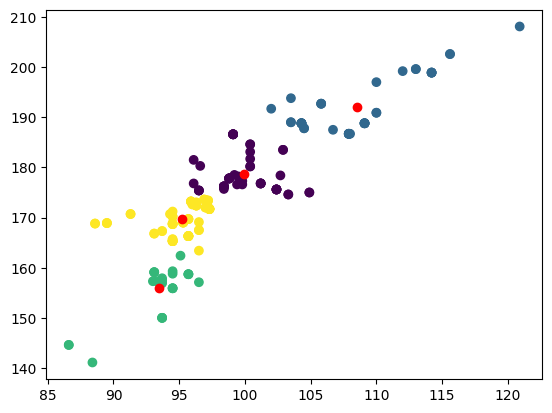

In [81]:
plt.scatter(X[:, 0], X[:, 1], c=CX, cmap='viridis', marker='o')
plt.scatter(C[:, 0], C[:, 1], c='red', marker='o')
plt.show()

# Zad 4

In [82]:
def clustering_quality(X, C, CX):
    inter_cluster_distance_sum = 0
    intra_cluster_distance_sum = 0

    e = 2

    K = len(C)

    # Obliczamy sumę odległości między centroidami
    for k in range(K):
        for l in range(k + 1, K):
            inter_cluster_distance_sum += distp([C[k]], [C[l]], e)[0][0]

    # Obliczamy sumę odległości wewnątrz klastrów
    for k in range(K):
        cluster_points = X[CX == k]
        for point in cluster_points:
            intra_cluster_distance_sum += distp([point], [C[k]], e)[0][0] ** 2

    # Dzielimy sumę odległości wewnątrz klastrów przez sumę odległości między klastrami
    clustering_quality = inter_cluster_distance_sum / intra_cluster_distance_sum

    return clustering_quality

In [83]:
print(clustering_quality(X, C, CX))

0.02696672899046957
